In [1]:
import matplotlib

# where does matplotlib stores fonts?
print(matplotlib.matplotlib_fname())

print(matplotlib.get_cachedir())

/Users/mac/Documents/jessy_venv/tb_no_tf/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
/Users/mac/.matplotlib


In [2]:
import os
from matplotlib import font_manager as fm, rcParams

fpath = os.path.join(rcParams["datapath"], "fonts/ttf/STKaiti.ttf")
print(fpath)

prop = fm.FontProperties(fname=fpath)
matplotlib.rcParams['font.family'] = prop.get_name()

/Users/mac/Documents/jessy_venv/tb_no_tf/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/STKaiti.ttf


In [3]:
from matplotlib import pyplot as plt
import matplotlib
import pickle as p
import random
import re
import sys
import numpy as np
from matplotlib.font_manager import FontProperties

matplotlib.rcParams['font.family'] = ['Heiti TC']

In [4]:
equal_xticks = True # equal ticks for dynasties/time spans
max_num = 10 # maximum number of polynomial lines to be displayed in the figure (limit=10 if the language is set to _en) 
lang = "_zh" # language of definition (options: _zh, _en)
pretrained_model = "" # tags of model name

In [5]:
def get_y_fitting(x_lst, y_lst, c):
    ''' polynominal curve fitting '''
    assert len(x_lst) == len(y_lst)
    points = np.array([(x_lst[i], y_lst[i]) for i in range(len(x_lst))])

    # get x and y vectors
    x = points[:,0]
    y = points[:,1]

    # calculate polynomial
    z = np.polyfit(x, y, 3)
    f = np.poly1d(z)

    # calculate new x's and y's
    x_new = np.linspace(x[0], x[-1], 100)
    y_new = f(x_new)

    plt.plot(x_new, y_new, c=c, linestyle='dashed')

In [6]:
with open(f'prob_fitting_ctext{lang}{pretrained_model}.data', 'rb') as f:
    d = p.load(f)  # load the sense modeling data

In [7]:
def track_sense(word):

    ''' visualize the diachronic evolvement of the word senses '''

    test = d[word]
    labels = []

    fig = plt.figure(word, figsize=(10, 10))

    # markers = ['o', '+', 'x', 'v', '^', 's']
    markers = ['o', 'v', '^', 's', 'p', 'P', 'h', 'H', 'D', '.'] #, ',', '<', '>', '1', '2', '3', '4', '8', '*', '+', 'x', 'X', 'd', 'D', '|', '_']
    random.shuffle(markers)

    plt.ylim((0, min(max([max(v['y']) for _, v in test.items()]) + 0.05, 1)))
    if equal_xticks == True:
        plt.xlim((min([min(v['x']) for _, v in test.items()])-0.1, max([max(v['x']) for _, v in test.items()])+0.1))
    else:
        plt.xlim((min([min(v['x']) for _, v in test.items()])-50, max([max(v['x']) for _, v in test.items()])+50))
    
    sense_id_lst = [sense_id for sense_id in test.keys() if int(re.sub(".+_", "", sense_id)) <= max_num]

    i = 1
    for k, v in test.items():
        if k in sense_id_lst:
            definition = v[f'definition']
            x = v['x']
            y = v['y']

            labels.append(k)

            max_l = 50
            if lang == "_en":
                max_l = 75
            if len(definition) > max_l:
                p0 = definition[:max_l]
                p1 = definition[max_l:]
                if len(p1) >= 4:
                    if p1[1] == ' ':
                        p0 = p0 + p1[0]
                        p1 = p1[1:]
                    if re.findall(r'[a-zA-Z]', p0[-1]) and re.findall(r'[a-zA-Z]', p1[0]):
                        p0 = p0 + '-'
                    if p1[0] == ' ':
                        p1 = p1[1:]
                    definition = p0 + '\n' + p1

            tag = k + ': ' + definition
        
            m = markers[i - 1]
            r = random.randint(0, 255)
            g = random.randint(0, 255)
            b = random.randint(0, 255)

            ch = '#' \
                + '{:0>2}'.format(hex(r)[2:]) \
                + '{:0>2}'.format(hex(g)[2:]) \
                + '{:0>2}'.format(hex(b)[2:]) \

            plt.scatter(x, y, label=tag, marker=m, c=ch, linewidths=2)
            get_y_fitting(x, y, ch)
            plt.legend(prop={'size': 13}, labelspacing=0.5, bbox_to_anchor=(0.5, -0.1), loc='upper center')

            i += 1

    plt.subplots_adjust(bottom=0.4, top=0.97, left=0.05, right=0.97)
    if equal_xticks == True:
        plt.xticks([1, 2, 3, 4, 5, 6], labels=["Tang", "Song", "Yuan", "Ming", "Qing", "1980s"])
    else:
        plt.xticks([618, 960, 1271, 1368, 1644, 1980], labels=["Tang\n(A.D. 618)", "Song\n(A.D. 960)", "Yuan\n(A.D. 1271)", "Ming\n(A.D. 1368)", "Qing\n(A.D. 1644)", "1980s"])
    plt.show()
    fig.savefig(f"{w}{lang}{pretrained_model}.png", dpi=600)
    fig.savefig(f"{w}{lang}{pretrained_model}.pdf", dpi=600)

/Users/mac/Documents/jessy_venv/tb_no_tf/lib/python3.7/site-packages/ipykernel_launcher.py:60: RankWarning: Polyfit may be poorly conditioned


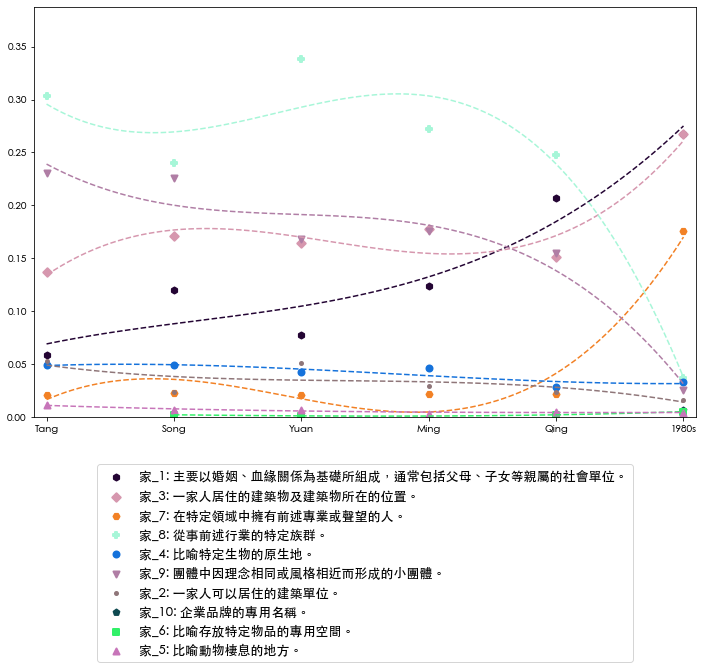

The PDF backend does not currently support the selected font.


RuntimeError: TrueType font is missing table

In [8]:
word_lst = ['家', 'jia']

for w in word_lst:
    if w not in d or not d[w]:
        print(w, 'not in the vocabulary.')
    else:
        track_sense(w)